### Importing all the libary

In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import warnings


                                          
#  Regression



In [ ]:
gender_pay_gap = pd.read_csv("Glassdoor Gender Pay Gap.csv")
gender_pay_gap.head(2)

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128


In [ ]:
gender_pay_gap.shape

(1000, 9)

In [ ]:
gender_pay_gap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
gender_pay_gap.isnull().sum()

JobTitle     0
Gender       0
Age          0
PerfEval     0
Education    0
Dept         0
Seniority    0
BasePay      0
Bonus        0
dtype: int64

In [ ]:
print("Number of duplicate rows:", gender_pay_gap.duplicated().sum())

Number of duplicate rows: 0


In [ ]:
gender_pay_gap.describe()

,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


In [ ]:
gender_pay_gap.describe(include=['object'])

,JobTitle,Gender,Education,Dept
count,1000,1000,1000,1000
unique,10,2,4,5
top,Marketing Associate,Male,High School,Operations
freq,118,532,265,210


In [ ]:
bonus_range = gender_pay_gap['Bonus'].max() - gender_pay_gap['Bonus'].min()
print('Bonus range is', bonus_range)

Bonus range is 9590


In [ ]:
bonus_cv = (gender_pay_gap['Bonus'].std() / gender_pay_gap['Bonus'].mean()) * 100
print('Bonus CV is {}%'.format(round(bonus_cv, 2)))


Bonus CV is 30.99%


In [ ]:
numeric = gender_pay_gap.select_dtypes(include='number')
corr = numeric.corr()
corr

,Age,PerfEval,Seniority,BasePay,Bonus
Age,1.000000,-0.056875,-0.021414,0.562681,-0.414337
PerfEval,-0.056875,1.000000,-0.021127,-0.053622,0.855500
Seniority,-0.021414,-0.021127,1.000000,0.511096,0.194982
BasePay,0.562681,-0.053622,0.511096,1.000000,-0.129481
Bonus,-0.414337,0.855500,0.194982,-0.129481,1.000000


In [ ]:
color_set = ['#FF5733', '#33FF57', '#3357FF', '#F333FF']

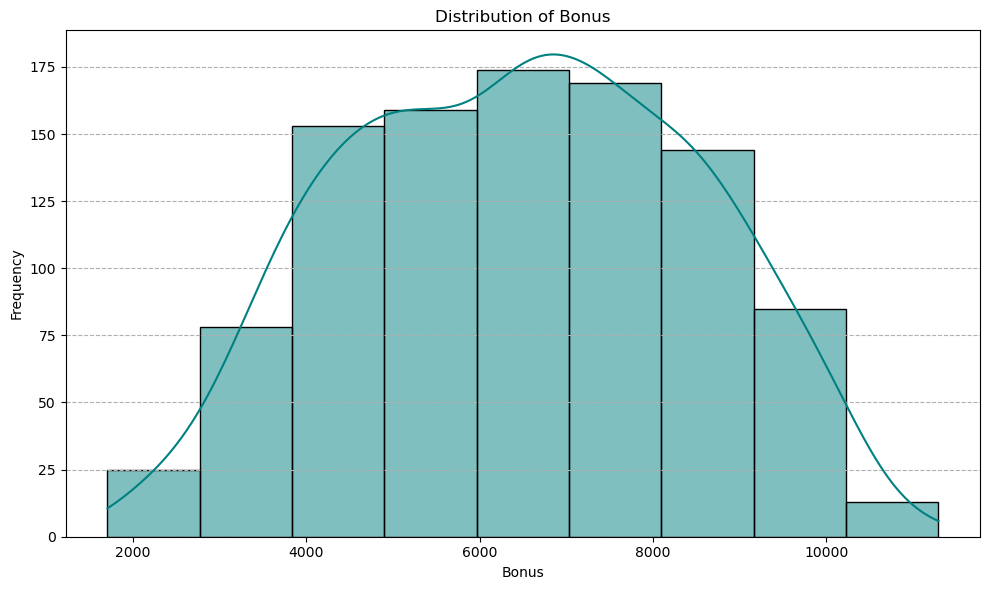

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(gender_pay_gap["Bonus"], bins=9, color=color_set[1],kde=True)
plt.title("Distribution of Bonus")
plt.xlabel("Bonus")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

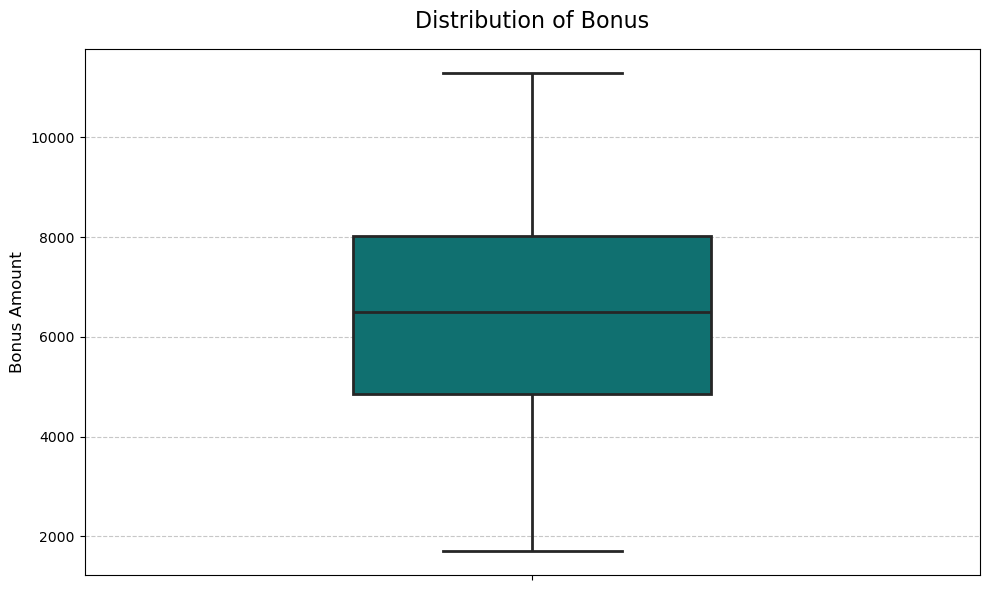

In [16]:
plt.figure(figsize=(10, 6))

# Create boxplot with better styling
sns.boxplot(data=gender_pay_gap, 
            y='Bonus', 
            color=color_set[1],  
            width=0.4,       
            fliersize=3,      
            linewidth=2)     

# Customize the plot
plt.title('Distribution of Bonus', fontsize=16, pad=15)
plt.ylabel('Bonus Amount', fontsize=12)

# Add grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Style improvements
plt.box(True)  # Add border


# Adjust layout
plt.tight_layout()
plt.show()

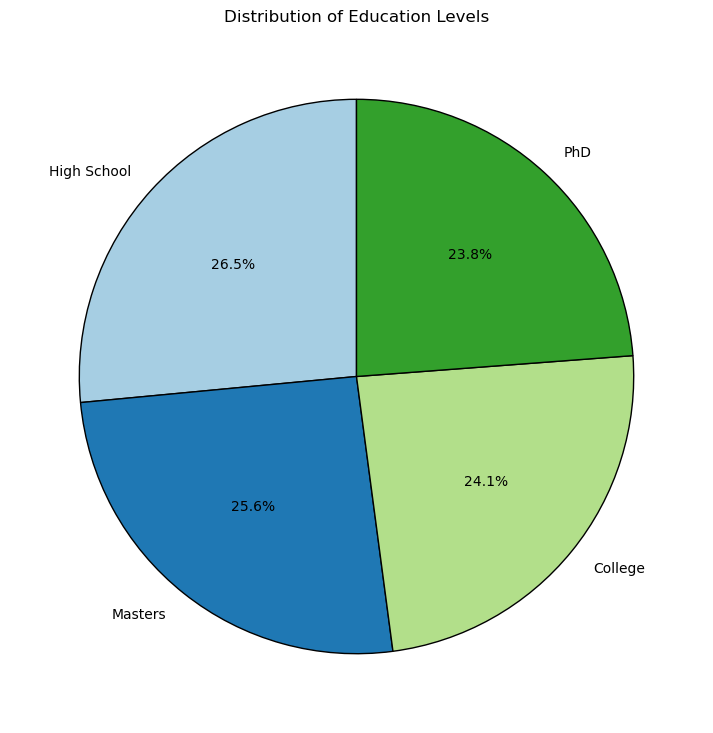

In [17]:
education_counts = gender_pay_gap['Education'].value_counts()

plt.figure(figsize=(10,9))
plt.pie(
    education_counts.values,
    labels=education_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Distribution of Education Levels")
plt.show()

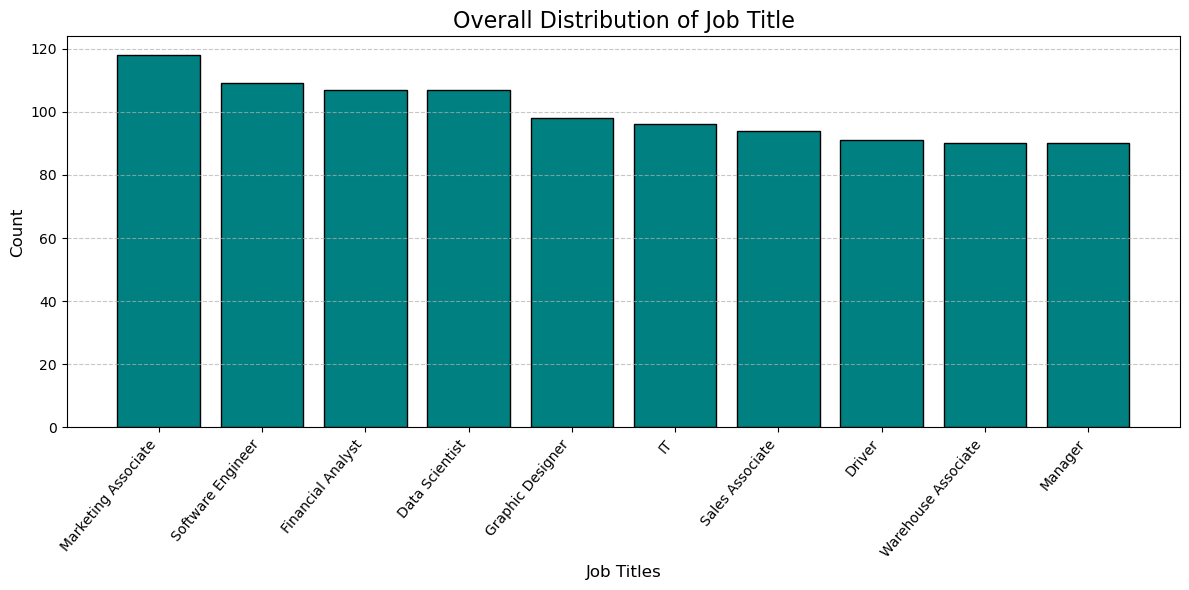

In [18]:
job_title_counts = gender_pay_gap['JobTitle'].value_counts()


plt.figure(figsize=(12, 6))
plt.bar(job_title_counts.index, job_title_counts.values, color=color_set[1], edgecolor='black')
plt.title('Overall Distribution of Job Title', fontsize=16)
plt.xlabel('Job Titles', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=50, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

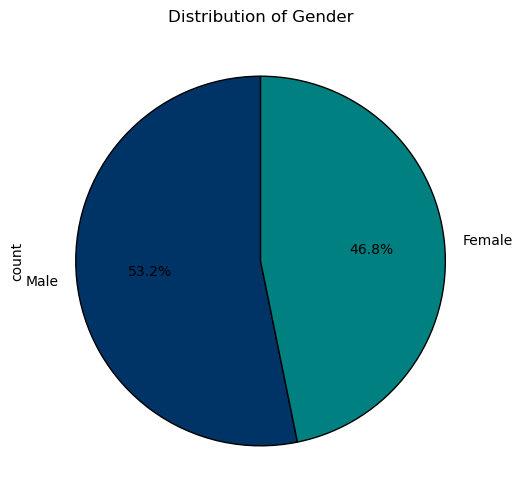

In [19]:
gender = gender_pay_gap['Gender'].value_counts()

plt.figure(figsize=(12, 6))
gender.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=color_set,
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Distribution of Gender")
plt.show()

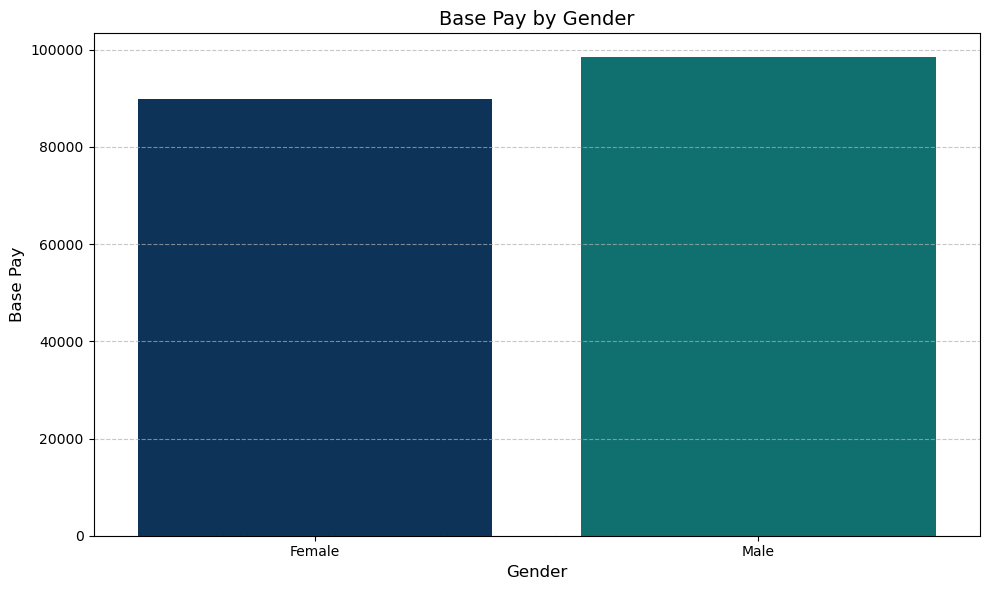

In [ ]:
plt.figure(figsize=(10, 6))

# Create bar plot with mean values
sns.barplot(data=gender_pay_gap, x='Gender', y='BasePay', palette=color_set, ci=None)

plt.title('Base Pay by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Base Pay', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

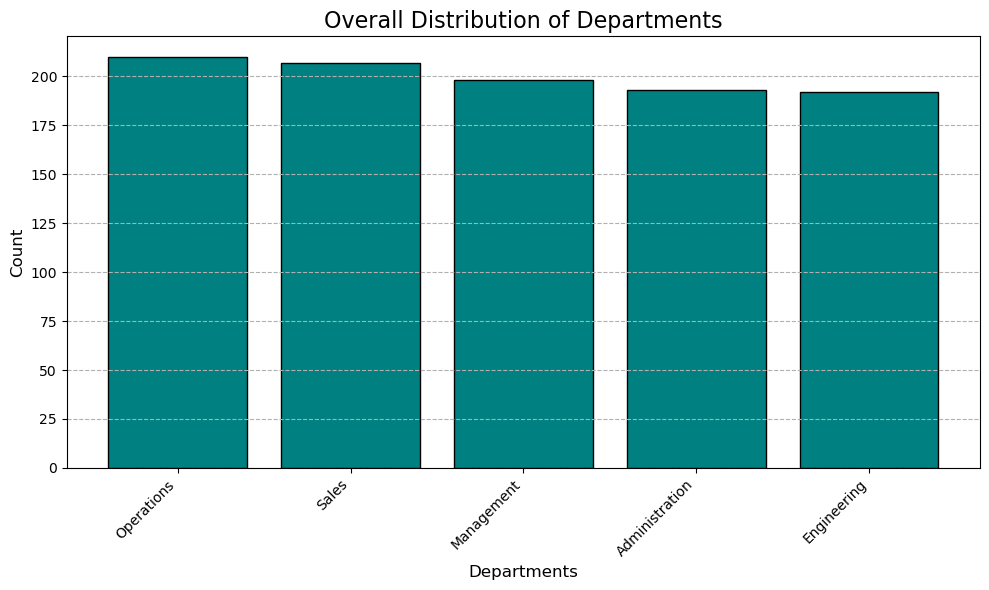

In [21]:
dept_counts = gender_pay_gap['Dept'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(dept_counts.index, dept_counts.values, color=color_set[1], edgecolor='black')
plt.title('Overall Distribution of Departments', fontsize=16)
plt.xlabel('Departments', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

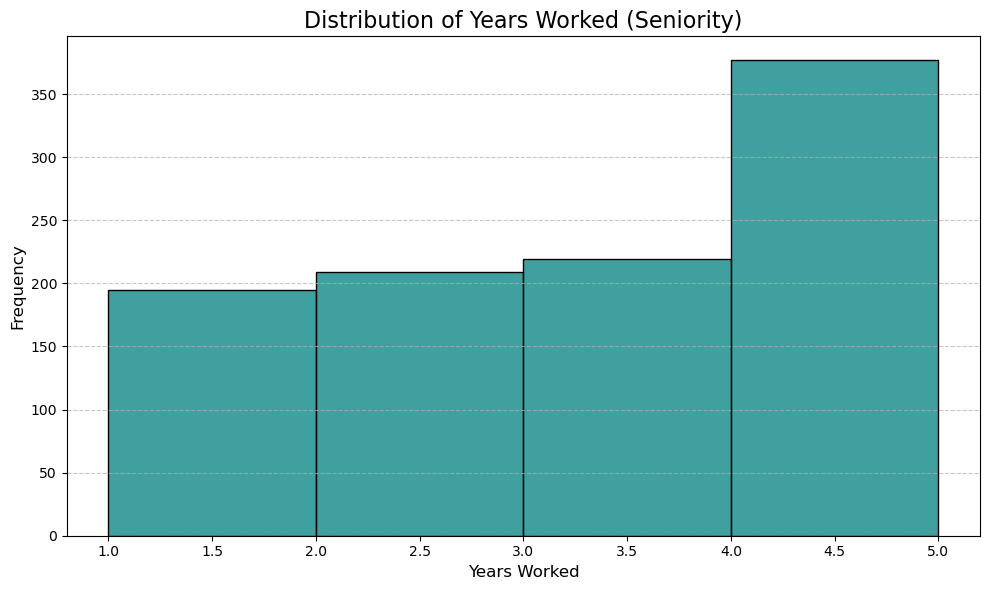

In [22]:
senority = gender_pay_gap['Seniority'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(data=gender_pay_gap, x='Seniority', bins=4, color=color_set[1], edgecolor='black')
plt.title('Distribution of Years Worked (Seniority)', fontsize=16)
plt.xlabel('Years Worked', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### it seems like there are more number of people working an average of more than four years

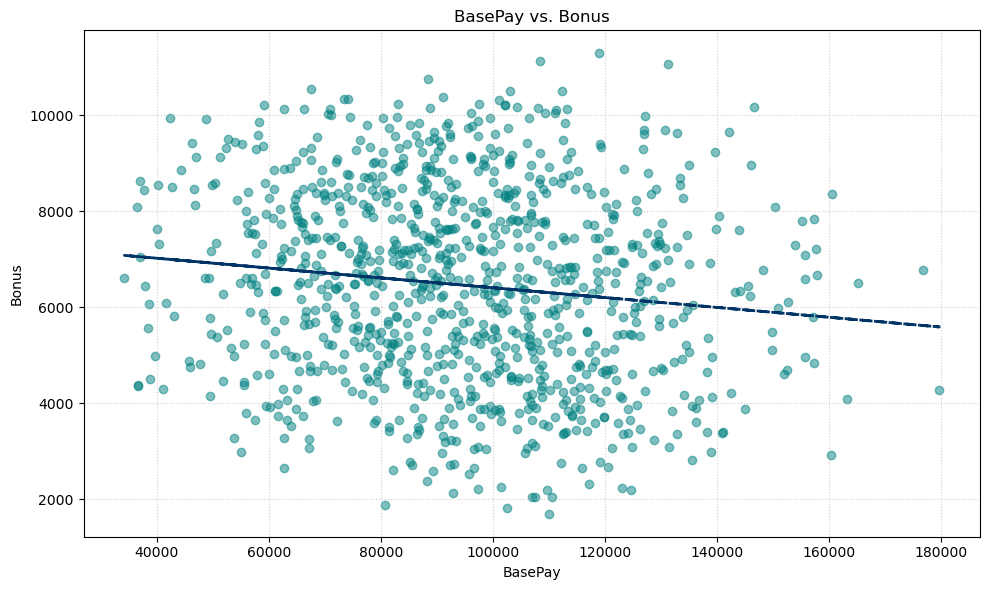

In [ ]:

plt.figure(figsize=(10, 6))


plt.scatter(gender_pay_gap['BasePay'], gender_pay_gap['Bonus'], 
           color=color_set[1], alpha=0.5)


z = np.polyfit(gender_pay_gap['BasePay'], gender_pay_gap['Bonus'], 1)
p = np.poly1d(z)
plt.plot(gender_pay_gap['BasePay'], p(gender_pay_gap['BasePay']), 
         color=color_set[0], linestyle='--', linewidth=2)


plt.title('BasePay vs. Bonus')
plt.xlabel('BasePay')
plt.ylabel('Bonus')
plt.grid(True, linestyle=':', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()

#### It seems like there is very slight relationshiop between bonus and basepay.

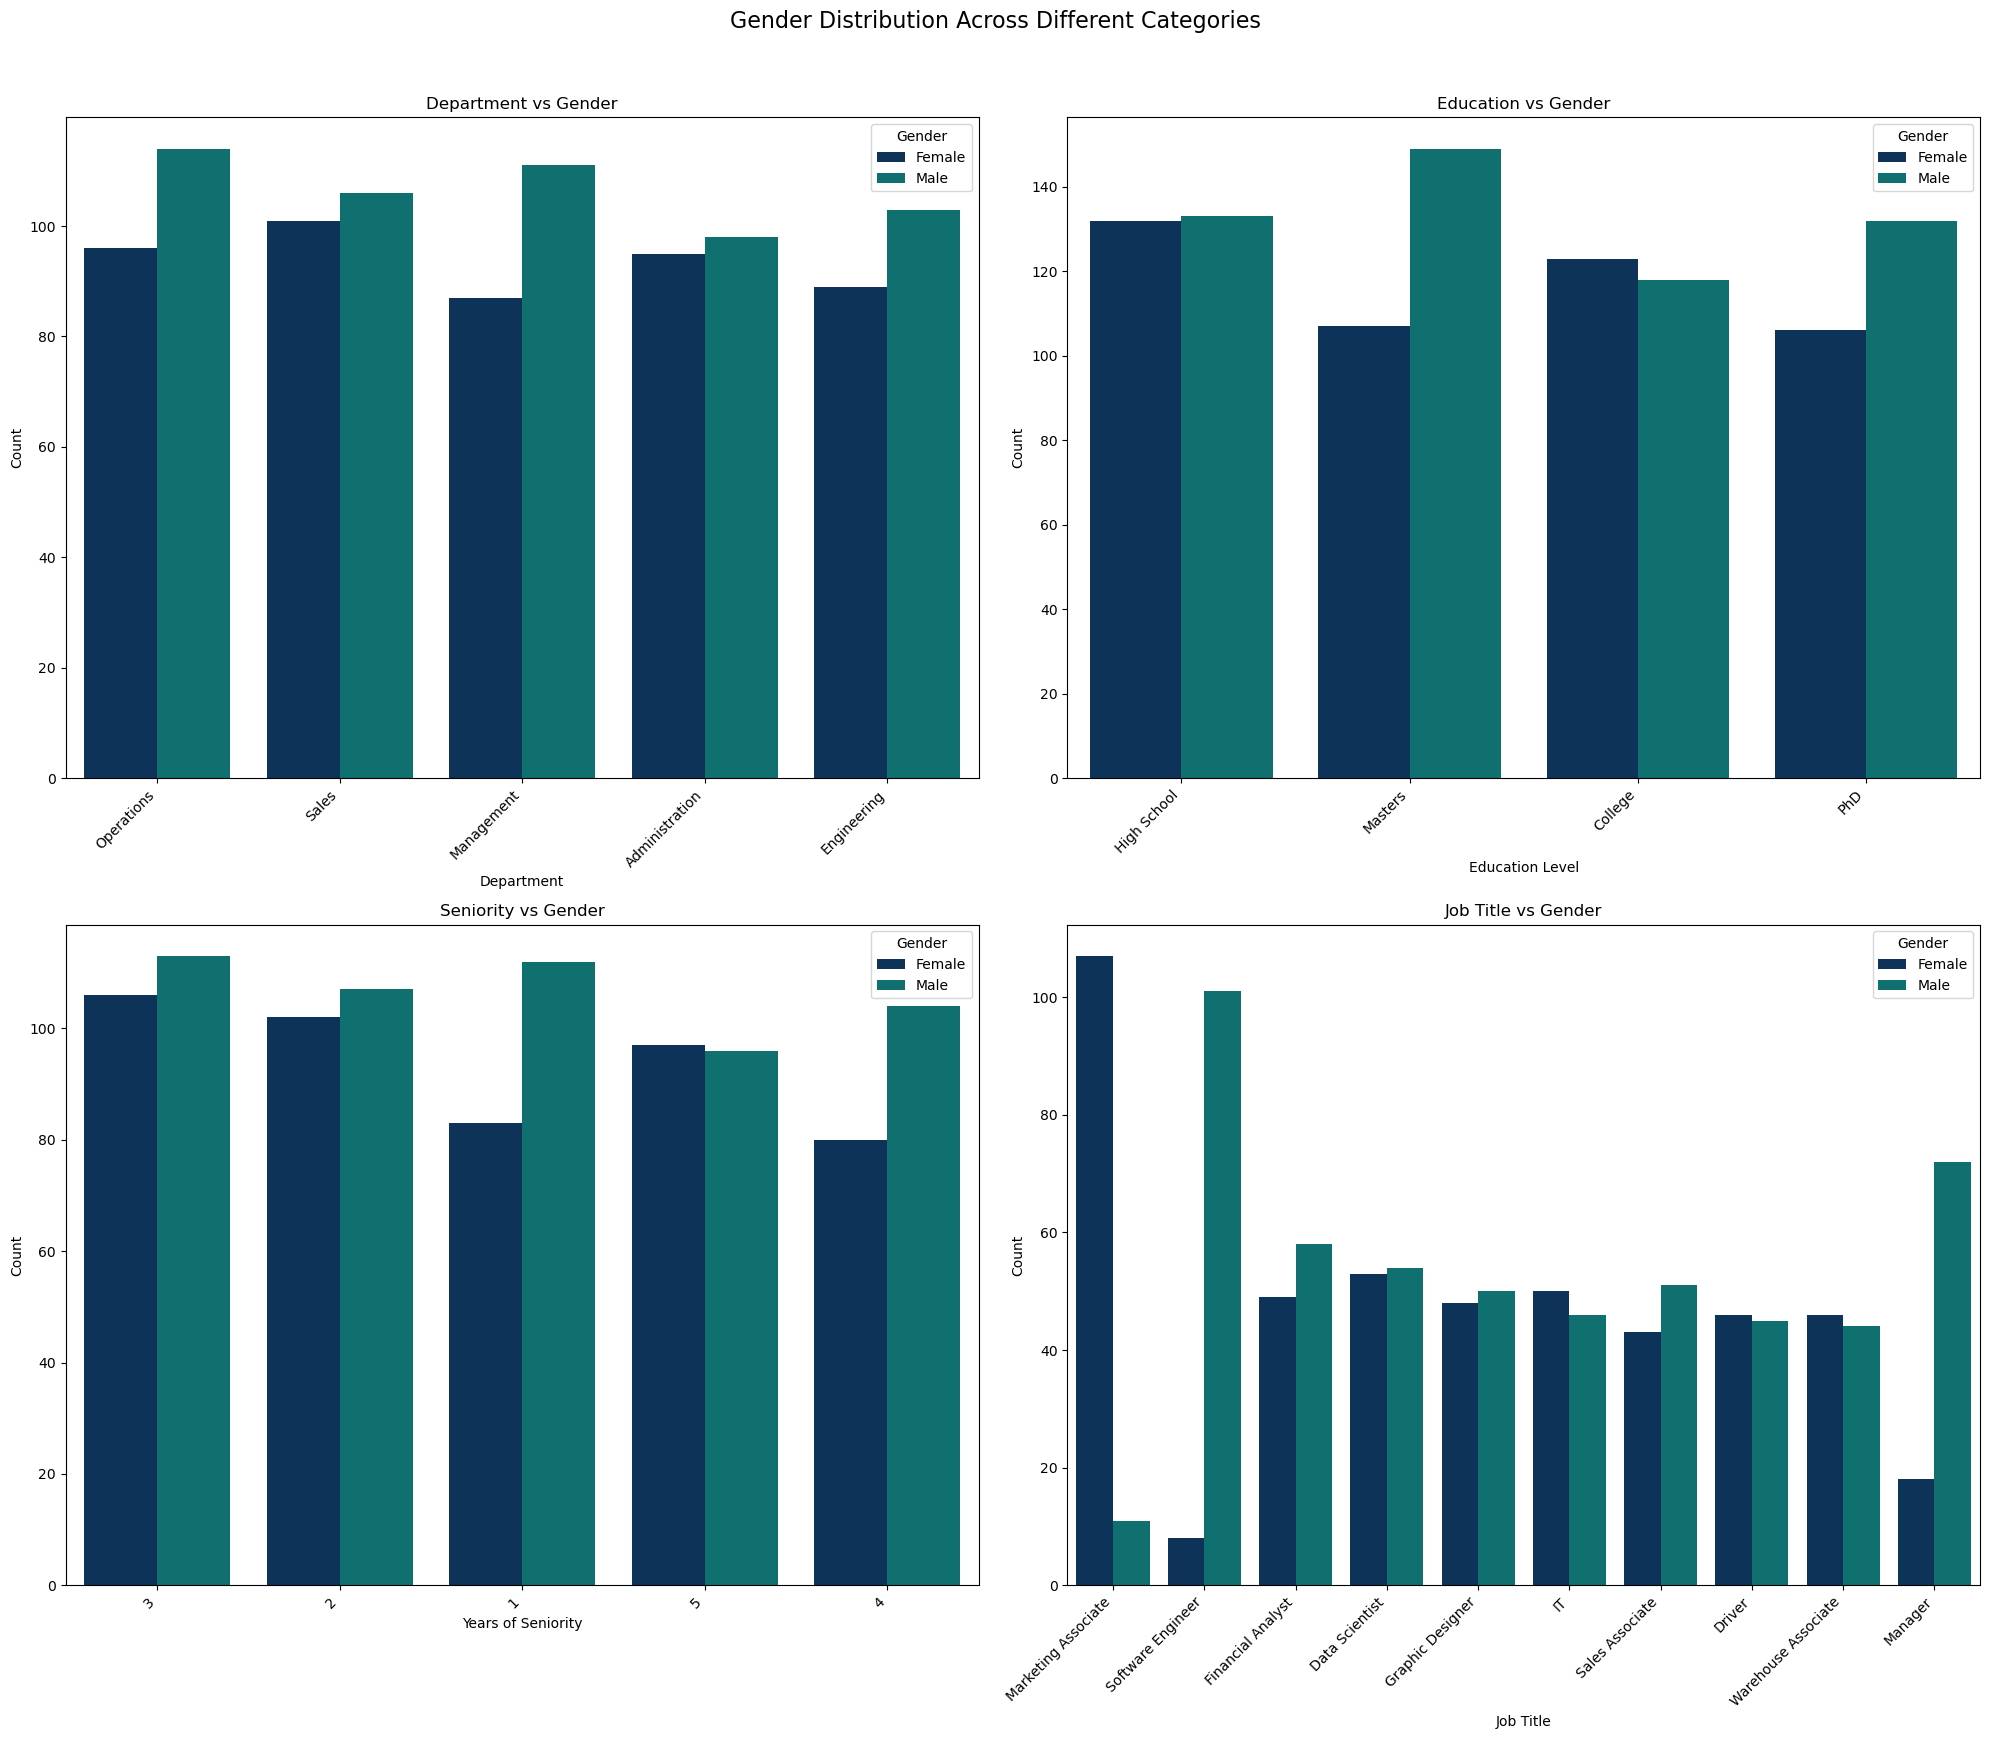

In [24]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 17))

# First subplot - Department vs Gender
sns.countplot(data=gender_pay_gap, x='Dept', hue='Gender',
             order=gender_pay_gap['Dept'].value_counts().index, 
             palette=color_set, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_title('Department vs Gender')
ax1.set_xlabel('Department')
ax1.set_ylabel('Count')

# Second subplot - Education vs Gender
sns.countplot(data=gender_pay_gap, x='Education', hue='Gender',
             order=gender_pay_gap['Education'].value_counts().index, 
             palette=color_set, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
ax2.set_title('Education vs Gender')
ax2.set_xlabel('Education Level')
ax2.set_ylabel('Count')

# Third subplot - Seniority vs Gender
sns.countplot(data=gender_pay_gap, x='Seniority', hue='Gender',
             order=gender_pay_gap['Seniority'].value_counts().index, 
             palette=color_set, ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, horizontalalignment='right')
ax3.set_title('Seniority vs Gender')
ax3.set_xlabel('Years of Seniority')
ax3.set_ylabel('Count')

# Fourth subplot - JobTitle vs Gender
sns.countplot(data=gender_pay_gap, x='JobTitle', hue='Gender',
             order=gender_pay_gap['JobTitle'].value_counts().index, 
             palette=color_set, ax=ax4)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, horizontalalignment='right')
ax4.set_title('Job Title vs Gender')
ax4.set_xlabel('Job Title')
ax4.set_ylabel('Count')

# Adjust layout and display
plt.suptitle('Gender Distribution Across Different Categories', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

#### The above barplot is of various metrices with respect to gender. As we can see on Job Title vs Gender, Men have higher population than female in software enginnering and managing but females have higher popluation than men in marketing associating. Does that mean females are not capable in these high level posts?

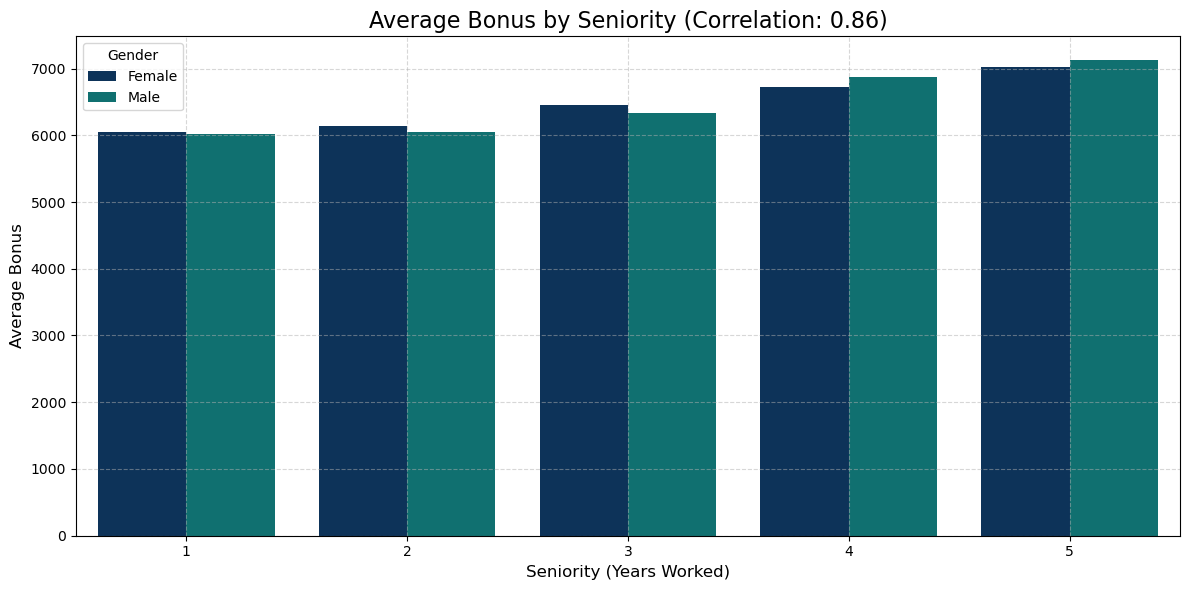


Correlation between Bonus and Seniority: 0.8555


In [25]:
# Calculate correlation
correlation = gender_pay_gap['Bonus'].corr(gender_pay_gap['PerfEval'])

plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(data=gender_pay_gap, x='Seniority', y='Bonus', hue="Gender", palette=color_set+[''], estimator=np.mean, ci=None)

# Add title and labels with correlation value
plt.title(f'Average Bonus by Seniority (Correlation: {correlation:.2f})', fontsize=16)
plt.xlabel('Seniority (Years Worked)', fontsize=12)
plt.ylabel('Average Bonus', fontsize=12)
plt.legend(title='Gender')
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

# Print detailed correlation information
print(f"\nCorrelation between Bonus and Seniority: {correlation:.4f}")

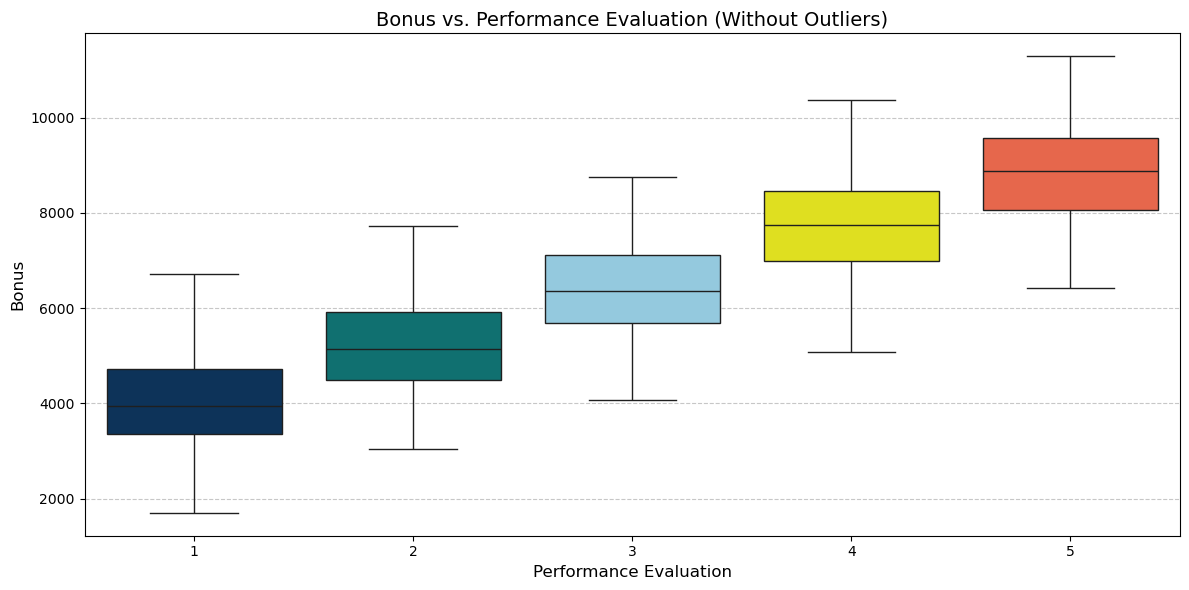

In [26]:
plt.figure(figsize=(12, 6))

# Create box plot without outliers
sns.boxplot(x='PerfEval', y='Bonus', 
            data=gender_pay_gap, 
            palette=color_set+['#FF5733'],
            showfliers=False)  # Removes outliers

# Customize plot
plt.title('Bonus vs. Performance Evaluation (Without Outliers)', fontsize=14)
plt.xlabel('Performance Evaluation', fontsize=12)
plt.ylabel('Bonus', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### The above boxplot shows that when Performance evaluation is increased, the median of bonus is also increasing.

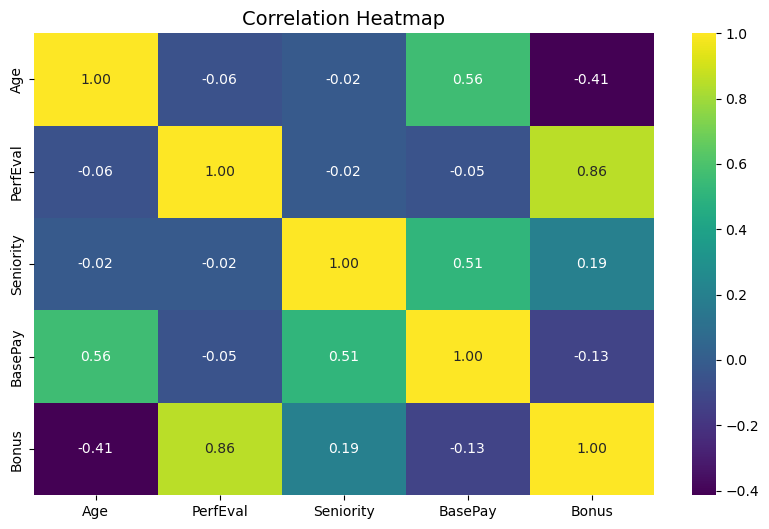

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=14)
plt.show()


### Preprocessing

#### The above correlation heat map shows that Perfeval and Bonus have the strongest relationship here.

### Outlier Detection and handling

In [28]:
def detect_outliers(dataset):
    """
    Analyze outliers in numerical columns of a dataset using the IQR method.
    
    Parameters:
    -----------
    dataset : pandas.DataFrame
        The input dataset containing numerical columns to analyze for outliers
        
    Returns:
    --------
    dict
        A dictionary containing outlier information for each numerical column with keys:
        - 'count': Number of outliers
        - 'lower_bound': Lower boundary for outlier detection
        - 'upper_bound': Upper boundary for outlier detection
        
    Example:
    --------
    >>> outlier_info = analyze_outliers(df)
    >>> print(outlier_info['column_name']['count'])
    
    Notes:
    ------
    Uses the Interquartile Range (IQR) method where outliers are defined as:
    - Below Q1 - 1.5*IQR
    - Above Q3 + 1.5*IQR
    """
    numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
    outlier_info = {}
    
    for column in numerical_cols:
        # Calculate IQR
        Q1 = dataset[column].quantile(0.25)
        Q3 = dataset[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outliers = dataset[(dataset[column] < lower_bound) | 
                          (dataset[column] > upper_bound)][column]
        
        # Store information
        outlier_info[column] = {
            'count': len(outliers),
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
        
        # Print summary
        print(f"\nOutlier Analysis for {column}:")
        print(f"Number of outliers: {outlier_info[column]['count']}")
        print(f"Lower bound: {outlier_info[column]['lower_bound']:.2f}")
        print(f"Upper bound: {outlier_info[column]['upper_bound']:.2f}")
        print("-" * 50)
    
    return outlier_info

In [29]:
outlier_analysis = detect_outliers(gender_pay_gap[['BasePay','Bonus']])


Outlier Analysis for BasePay:
Number of outliers: 3
Lower bound: 24788.62
Upper bound: 163619.62
--------------------------------------------------

Outlier Analysis for Bonus:
Number of outliers: 0
Lower bound: 84.75
Upper bound: 12790.75
--------------------------------------------------


In [30]:
gender_pay_gap_clean = gender_pay_gap[
    (gender_pay_gap['BasePay'] >= 24788.62) & 
    (gender_pay_gap['BasePay'] <= 163619.62)
]

# Print shape information
print(f"Original dataset shape: {gender_pay_gap.shape}")
print(f"Dataset shape after removing outliers: {gender_pay_gap_clean.shape}")

Original dataset shape: (1000, 9)
Dataset shape after removing outliers: (997, 9)


### Standatdization

### Categoricla encoding

In [31]:
job_title_categories = [['Marketing Associate', 'Software Engineer', 'Financial Analyst', 'Data Scientist', 'Graphic Designer', 'IT','Sales Associate','Driver','Warehouse Associate','Manager']]
gender_categories = [['Male', 'Female']]
education_categories = [['High School', 'College', 'Masters', 'PhD']]
dept_categories = [['Operations', 'Sales', 'Management', 'Administration', 'Engineering']]

# Initialize encoders
job_encoder = OrdinalEncoder(categories=job_title_categories)
gender_encoder = OrdinalEncoder(categories=gender_categories)
education_encoder = OrdinalEncoder(categories=education_categories)
dept_encoder = OrdinalEncoder(categories=dept_categories)

# JobTitle encoding (add 1 to start from 1)
gender_pay_gap_clean['JobTitle'] = job_encoder.fit_transform(gender_pay_gap_clean[['JobTitle']])

# Gender encoding (add 1 to start from 1)
gender_pay_gap_clean['Gender'] = gender_encoder.fit_transform(gender_pay_gap_clean[['Gender']])

# Education encoding (add 1 to start from 1)
gender_pay_gap_clean['Education'] = education_encoder.fit_transform(gender_pay_gap_clean[['Education']]) 

# Department encoding (add 1 to start from 1)
gender_pay_gap_clean['Dept'] = dept_encoder.fit_transform(gender_pay_gap_clean[['Dept']]) 


### Train Test Split

In [32]:
X = gender_pay_gap_clean.drop('Bonus', axis=1)
y = gender_pay_gap_clean["Bonus"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=32)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train

array([[-0.07936761,  1.057611  ,  0.73227961, ...,  0.71855571,
        -1.37742478, -1.09464295],
       [-0.42296525, -0.94552723, -0.46402276, ..., -1.38578602,
         1.4884411 ,  0.19954865],
       [ 0.26423004, -0.94552723,  1.57672834, ..., -0.68433878,
        -1.37742478, -0.04025392],
       ...,
       [-0.42296525, -0.94552723, -0.32328131, ...,  0.71855571,
        -0.66095831, -0.60350462],
       [ 0.26423004,  1.057611  ,  0.02857233, ...,  1.42000296,
        -0.66095831, -0.9498595 ],
       [ 0.60782769, -0.94552723,  0.66190888, ...,  0.01710847,
        -0.66095831,  0.18119132]])

### Model from  Scratch (Linear Regression)

In [33]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = np.dot(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, theta, learning_rate, epochs):
    m = len(y)
    cost_history = []

    for _ in range(epochs):
        y_pred = np.dot(X, theta)
        error = y_pred - y
        gradient = (1/m) * np.dot(X.T, error)
        theta -= learning_rate * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

def linear_regression(X, y, learning_rate=0.1, epochs=1000):
    X = np.c_[np.ones(X.shape[0]), X]  # Adding bias term (intercept)
    theta = np.zeros(X.shape[1])  # Initialize weights

    if np.isnan(X).any() or np.isinf(X).any() or np.isnan(y).any() or np.isinf(y).any():
        raise ValueError("Input contains NaN or infinite values. Please handle them before training.")

    return gradient_descent(X, y, theta, learning_rate, epochs)

def predict(X, theta):
    X = np.c_[np.ones(X.shape[0]), X]  # Adding bias term
    return np.dot(X, theta)

# Train the model
theta, cost_history = linear_regression(X_train, y_train, learning_rate=0.1, epochs=1000)

# Make predictions
y_train_pred = predict(X_train, theta)
y_test_pred = predict(X_test, theta)


def evaluate_error(y_train, y_pred, set):
    """
    Calculate and print evaluation metrics for the specified dataset.

    Args:
        y_train (np.ndarray): True values
        y_pred (np.ndarray): Predicted values
        set (str): Dataset type ('Train' or 'Test')
    """
    # Calculate metrics
    mse = mean_squared_error(y_train, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    adj_r2 = 1 - (1-r2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    
    
    # Print metrics
    print(f"\n{set} Set Metrics:")
    print("="*50)
    print(f"Mean Squared Error (MSE)          : {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE)    : {rmse:.4f}")
    print(f"Mean Absolute Error (MAE)         : {mae:.4f}")
    print(f"R² Score                         : {r2:.4f}")
    print(f"Adjusted R² Score                : {adj_r2:.4f}")

evaluate_error(y_train, y_train_pred, 'Train')
evaluate_error(y_test, y_test_pred, 'Test')



Train Set Metrics:
Mean Squared Error (MSE)          : 326700.8047
Root Mean Squared Error (RMSE)    : 571.5775
Mean Absolute Error (MAE)         : 455.6496
R² Score                         : 0.9172
Adjusted R² Score                : 0.9163

Test Set Metrics:
Mean Squared Error (MSE)          : 314122.1721
Root Mean Squared Error (RMSE)    : 560.4660
Mean Absolute Error (MAE)         : 449.4903
R² Score                         : 0.9248
Adjusted R² Score                : 0.9227


### Primary Model


   #### Gradient Boosting Regressor

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Fit the model
gb_model.fit(X_train, y_train)

# Make predictions
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

# Evaluate final model
evaluate_error(y_train, y_train_pred, "Train")
evaluate_error(y_test, y_test_pred, "Test")


Train Set Metrics:
Mean Squared Error (MSE)          : 184988.5664
Root Mean Squared Error (RMSE)    : 430.1030
Mean Absolute Error (MAE)         : 337.4477
R² Score                         : 0.9531
Adjusted R² Score                : 0.9526

Test Set Metrics:
Mean Squared Error (MSE)          : 330423.0919
Root Mean Squared Error (RMSE)    : 574.8244
Mean Absolute Error (MAE)         : 449.7230
R² Score                         : 0.9209
Adjusted R² Score                : 0.9187


   #### RandomForestRegressor

In [35]:
# Initialize the model
rf_model = RandomForestRegressor(max_depth=6)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions for both train and test sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate the model
evaluate_error(y_train, y_train_pred, "Train")
evaluate_error(y_test, y_test_pred, "Test")




Train Set Metrics:
Mean Squared Error (MSE)          : 224989.0793
Root Mean Squared Error (RMSE)    : 474.3301
Mean Absolute Error (MAE)         : 381.0958
R² Score                         : 0.9430
Adjusted R² Score                : 0.9423

Test Set Metrics:
Mean Squared Error (MSE)          : 406930.4670
Root Mean Squared Error (RMSE)    : 637.9110
Mean Absolute Error (MAE)         : 506.3227
R² Score                         : 0.9026
Adjusted R² Score                : 0.8999


### Hyperparameter Tunning

#### Model-1

In [36]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 0.9]
}

# Define scoring metrics
scoring = {
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'r2': 'r2'
}

# Initialize and fit GridSearchCV
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=32),
    param_grid=param_grid,
    cv=4,
    scoring=scoring,
    refit='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Print best parameters and score
print("\nBest Parameters Found:")
print("="*50)
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")

# Store best parameters
best_params_boosting_regressor = {
    'n_estimators': grid_search.best_params_['n_estimators'],
    'learning_rate': grid_search.best_params_['learning_rate'],
    'max_depth': grid_search.best_params_['max_depth'],
    'min_samples_split': grid_search.best_params_['min_samples_split'],
    'min_samples_leaf': grid_search.best_params_['min_samples_leaf'],
    'subsample': grid_search.best_params_['subsample']
}

Fitting 4 folds for each of 288 candidates, totalling 1152 fits

Best Parameters Found:
learning_rate: 0.1
max_depth: 3
min_samples_leaf: 1
min_samples_split: 5
n_estimators: 100
subsample: 0.8


Model-2

In [37]:
# Define the parameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the model
rf_model = RandomForestRegressor(random_state=32)

# Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of different combinations to try
    scoring='r2',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,
    random_state=32
)

# Fit the RandomizedSearchCV to find the best parameters
random_search.fit(X_train, y_train)

# Best parameters and model
best_params_random_forest = random_search.best_params_
print(f'The best parameters are {best_params_random_forest}') 

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.2s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   3.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   5.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   2.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   2.4s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   2.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   2.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   2.6s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   2.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, max_fe

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   2.3s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   2.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   1.5s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   1.8s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.0s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.0s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.6s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.9s
[CV] END bootstrap=True, max_depth=5, max_features=aut

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, max_features

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

[CV] END bootstrap=False, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END bootstrap=False, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END bootstrap=False, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END bootstrap=False, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   1.4s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   1.6s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=5, max_feature

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   2.3s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.3s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.6s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   2.2s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   2.3s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   2.2s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   2.2s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.5s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   2.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.7s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.5s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.5s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   2.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   3.3s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   2.9s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   3.1s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.4s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.5s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   2.0s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   2.0s
[CV] END bootstrap=False, max_depth=15, 

### Feature Selection

#### Model-1


The selected 5 feature are Index(['JobTitle', 'Age', 'PerfEval', 'Dept', 'Seniority', 'BasePay'], dtype='object')


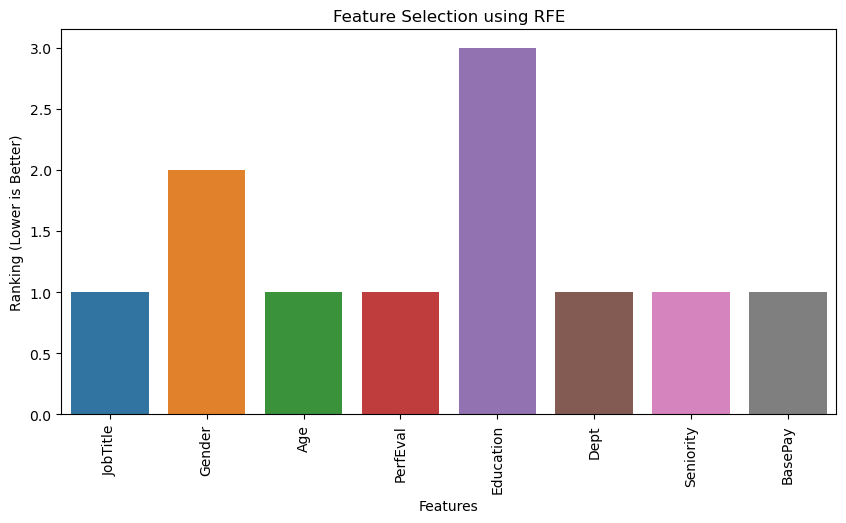

In [38]:


# Initialize base model for RFE (Linear Regression)
boosting_model = GradientBoostingRegressor(**best_params_boosting_regressor)
# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=boosting_model, n_features_to_select=6) 
rfe.fit(X, y)

# Get rankings of features
feature_ranking = rfe.ranking_
selected_features_gradient_boosting = X.columns[rfe.support_]
print(f'The selected 5 feature are {selected_features_gradient_boosting}')


# Plot feature importance ranking
plt.figure(figsize=(10, 5))
sns.barplot(x=X.columns, y=feature_ranking, palette="tab10")
plt.xlabel("Features")
plt.ylabel("Ranking (Lower is Better)")
plt.title("Feature Selection using RFE")
plt.xticks(rotation=90)
plt.show()

#### Model-2



The selected 5 feature are Index(['JobTitle', 'Age', 'PerfEval', 'Dept', 'Seniority', 'BasePay'], dtype='object')


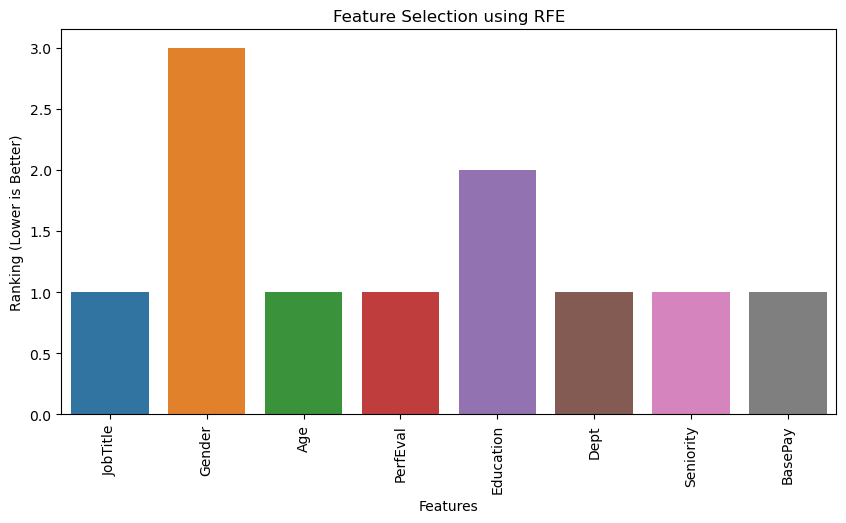

In [39]:
from sklearn.feature_selection import RFE

# Initialize base model for RFE 
model = RandomForestRegressor()
# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=model, n_features_to_select=6) 
rfe.fit(X, y)

# Get rankings of features
feature_ranking = rfe.ranking_
selected_features_random_forest = X.columns[rfe.support_]
print(f'The selected 5 feature are {selected_features_random_forest}')


# Plot feature importance ranking
plt.figure(figsize=(10, 5))
sns.barplot(x=X.columns, y=feature_ranking, palette="tab10")
plt.xlabel("Features")
plt.ylabel("Ranking (Lower is Better)")
plt.title("Feature Selection using RFE")
plt.xticks(rotation=90)
plt.show()

### Final Model

In [40]:
X = gender_pay_gap_clean[selected_features_gradient_boosting]
y= gender_pay_gap_clean['Bonus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=32)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
gb_model = GradientBoostingRegressor(**best_params_boosting_regressor)

# Fit the model
gb_model.fit(X_train, y_train)

# Make predictions
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

# Evaluate final model
evaluate_error(y_train, y_train_pred, "Train")
evaluate_error(y_test, y_test_pred, "Test")


Train Set Metrics:
Mean Squared Error (MSE)          : 210582.5535
Root Mean Squared Error (RMSE)    : 458.8927
Mean Absolute Error (MAE)         : 363.0795
R² Score                         : 0.9466
Adjusted R² Score                : 0.9462

Test Set Metrics:
Mean Squared Error (MSE)          : 362964.6054
Root Mean Squared Error (RMSE)    : 602.4654
Mean Absolute Error (MAE)         : 476.0295
R² Score                         : 0.9131
Adjusted R² Score                : 0.9113
